<h3>ФБ-31 Шваюк Олександра. Лабораторна робота №4. Частина 2</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

print("Setup is complete")

Створення dataframe

In [ ]:
def create_dataframe_from_csv(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path, delimiter=';')
        print(f"DataFrame successfully created from {csv_file_path}")
        return df
    except Exception as e:
        print(f"Помилка при створенні DataFrame: {e}")
        return None

def create_ndarray_from_csv(csv_file_path):
    try:
        data = np.genfromtxt(csv_file_path, delimiter=';', skip_header=1) 
        print(f"NumPy ndarray successfully created from {csv_file_path}")
        return data
    except Exception as e:
        print(f"Помилка при створенні ndarray: {e}")
        return None

def print_head(data, num_rows=7):
    if isinstance(data, pd.DataFrame):
        data_list = data.head(num_rows).values.tolist()
        headers = data.columns.tolist()
        print(tabulate(data_list, headers=headers, tablefmt="rounded_grid", showindex=False))
    elif isinstance(data, np.ndarray):
        print(tabulate(data[:num_rows], tablefmt="rounded_grid"))
    else:
        print("Непідтримуваний тип даних")

csv_file_path = 'winequality-white.csv'
df = create_dataframe_from_csv(csv_file_path)
if df is not None:
    print_head(df, num_rows=5)

ndarray_data = create_ndarray_from_csv(csv_file_path)
if ndarray_data is not None:
    print_head(ndarray_data, num_rows=5)


1. Поборотися із зниклими даними.


In [ ]:
def handle_missing_values(data):
    if isinstance(data, pd.DataFrame):
        data_filled = data.fillna(data.mean())
        print("Missing values in DataFrame filled with the mean of each column.")
        return data_filled
    elif isinstance(data, np.ndarray):
        col_means = np.nanmean(data, axis=0)
        inds = np.where(np.isnan(data))
        data[inds] = np.take(col_means, inds[1])
        print("Missing values in NumPy ndarray filled with the mean of each column.")
        return data
    else:
        print("Unsupported data type. Please provide either a Pandas DataFrame or a NumPy ndarray.")
        return data

df_cleaned = handle_missing_values(df)
print_head(df_cleaned)

np_data = np.genfromtxt(csv_file_path, delimiter=';', skip_header=1)
np_data_cleaned = handle_missing_values(np_data)
print_head(np_data_cleaned)


2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [ ]:
def normalize(data):
    if isinstance(data, pd.DataFrame):
        data_normalized = data.copy()
        for column in data.columns:
            min_val = data[column].min()
            max_val = data[column].max()
            data_normalized[column] = (data[column] - min_val) / (max_val - min_val)
        print("Normalization (Min-Max scaling) applied to DataFrame.")
        return data_normalized
    
    elif isinstance(data, np.ndarray):
        min_val = np.nanmin(data, axis=0) 
        max_val = np.nanmax(data, axis=0) 
        data_normalized = (data - min_val) / (max_val - min_val)
        print("Normalization (Min-Max scaling) applied to NumPy array.")
        return data_normalized

    else:
        print("Unsupported data type. Please provide either a Pandas DataFrame or a NumPy ndarray.")
        return None

def standardize(data):
    if isinstance(data, pd.DataFrame):
        data_standardized = data.copy()
        for column in data.columns:
            mean_val = data[column].mean()
            std_dev = data[column].std()
            data_standardized[column] = (data[column] - mean_val) / std_dev
        print("Standardization (Z-score normalization) applied to DataFrame.")
        return data_standardized

    elif isinstance(data, np.ndarray):
        mean_val = np.nanmean(data, axis=0)  
        std_dev = np.nanstd(data, axis=0)   
        data_standardized = (data - mean_val) / std_dev
        print("Standardization (Z-score normalization) applied to NumPy array.")
        return data_standardized

    else:
        print("Unsupported data type. Please provide either a Pandas DataFrame or a NumPy ndarray.")
        return None

csv_file_path = 'winequality-white.csv'

df = pd.read_csv(csv_file_path, delimiter=';')
np_data = np.genfromtxt(csv_file_path, delimiter=';', skip_header=1)

df_normalized = normalize(df)
np_data_normalized = normalize(np_data)

df_standardized = standardize(df)
np_data_standardized = standardize(np_data)

print("Normalized DataFrame:")
print_head(df_normalized)

print("Standardized DataFrame:")
print_head(df_standardized)

print("Normalized NumPy array:")
print_head(np_data_normalized)

print("Standardized NumPy array:")
print_head(np_data_standardized)


3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

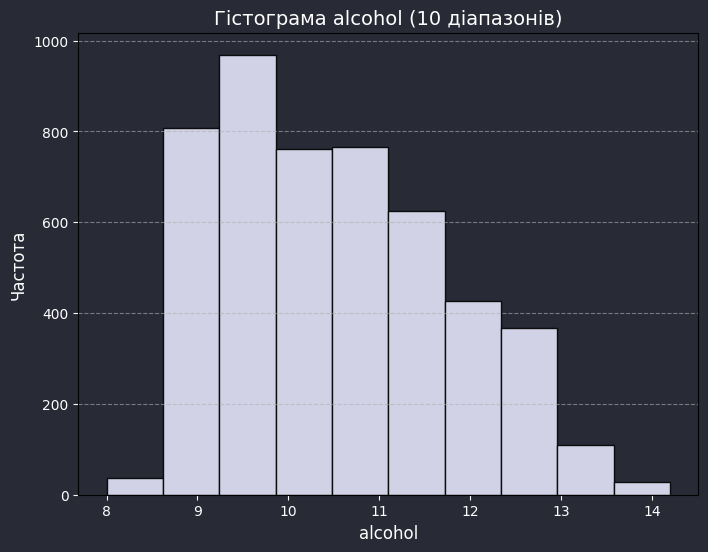

In [ ]:
def plot_histogram(data, column, bins=10):
    if isinstance(data, pd.DataFrame):
        values = data[column].dropna()
        col_name = column
    elif isinstance(data, np.ndarray):
        values = data[:, column]
        col_name = f"Column {column}"
    else:
        print("Непідтримуваний формат даних.")
        return

    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor('#282a36')  
    ax.set_facecolor('#282a36')  

    plt.hist(values, bins=bins, color="#E6E6FA", edgecolor='black', alpha=0.9)  
    plt.xlabel(col_name, fontsize=12, color='white')  
    plt.ylabel("Частота", fontsize=12, color='white')  
    plt.title(f"Гістограма {col_name} ({bins} діапазонів)", fontsize=14, color='white')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.show()

csv_file_path = 'winequality-white.csv'
df = pd.read_csv(csv_file_path, delimiter=';')
plot_histogram(df, "alcohol", bins=10)


4. Збудувати графік залежності одного integer/real атрибута від іншого.


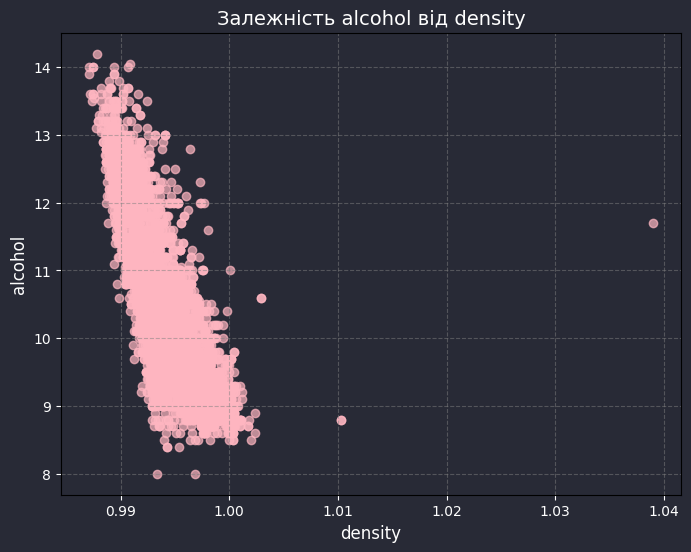

In [ ]:
def plot_scatter(data, x_column, y_column):
    if x_column not in data.columns or y_column not in data.columns:
        print("Одна або обидві вибрані колонки відсутні в даних.")
        return
    
    x_values = data[x_column].dropna()
    y_values = data[y_column].dropna()

    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor('#282a36')  
    ax.set_facecolor('#282a36')  
    plt.scatter(x_values, y_values, color="#FFB6C1", alpha=0.7) 
    plt.xlabel(x_column, fontsize=12, color='white')
    plt.ylabel(y_column, fontsize=12, color='white')
    plt.title(f"Залежність {y_column} від {x_column}", fontsize=14, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.grid(color='gray', linestyle='--', alpha=0.5)
    plt.show()

csv_file_path = 'winequality-white.csv'
df = pd.read_csv(csv_file_path, delimiter=';')
plot_scatter(df, "density", "alcohol")


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.


In [25]:
from scipy.stats import spearmanr

def calculate_correlations(data, column1, column2):
    if column1 not in data.columns or column2 not in data.columns:
        print("Одна або обидві вибрані колонки відсутні в даних.")
        return
    
    df_filtered = data[[column1, column2]].dropna()

    pearson_corr = df_filtered[column1].corr(df_filtered[column2])
    spearman_corr, _ = spearmanr(df_filtered[column1], df_filtered[column2])

    print(f"Коефіцієнт кореляції Пірсона ({column1} vs {column2}): {pearson_corr:.4f}")
    print(f"Коефіцієнт кореляції Спірмена ({column1} vs {column2}): {spearman_corr:.4f}")

csv_file_path = 'winequality-white.csv'
df = pd.read_csv(csv_file_path, delimiter=';')
calculate_correlations(df, "density", "alcohol")


Коефіцієнт кореляції Пірсона (density vs alcohol): -0.7801
Коефіцієнт кореляції Спірмена (density vs alcohol): -0.8219


6. Провести One Hot Encoding категоріального string атрибуту.


In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def one_hot_encode(data, column):
    if column not in data.columns:
        print(f"Колонка '{column}' відсутня у DataFrame.")
        return data

    encoded_df = pd.get_dummies(data, columns=[column], prefix=column)
    encoded_df.iloc[:, -7:] = encoded_df.iloc[:, -7:].astype(np.int8)

    return encoded_df

csv_file_path = 'winequality-white.csv'
df = pd.read_csv(csv_file_path, delimiter=';')

encoded_df = one_hot_encode(df, "quality")

print_head(encoded_df)


╭─────────────────┬────────────────────┬───────────────┬──────────────────┬─────────────┬───────────────────────┬────────────────────────┬───────────┬──────┬─────────────┬───────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────╮
│   fixed acidity │   volatile acidity │   citric acid │   residual sugar │   chlorides │   free sulfur dioxide │   total sulfur dioxide │   density │   pH │   sulphates │   alcohol │   quality_3 │   quality_4 │   quality_5 │   quality_6 │   quality_7 │   quality_8 │   quality_9 │
├─────────────────┼────────────────────┼───────────────┼──────────────────┼─────────────┼───────────────────────┼────────────────────────┼───────────┼──────┼─────────────┼───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│             7   │               0.27 │          0.36 │             20.7 │       0.045 │                    45 │                    170 │    1.001  │ 3  

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

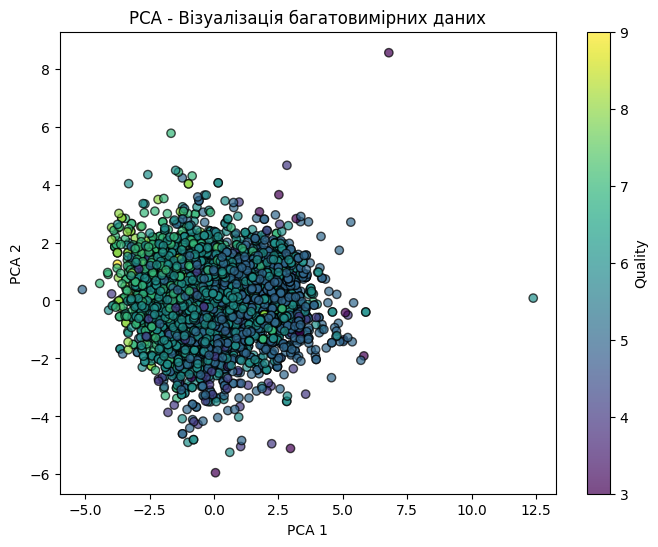

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

csv_file_path = 'winequality-white.csv'
df = pd.read_csv(csv_file_path, delimiter=';')
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - Візуалізація багатовимірних даних')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Quality')
plt.show()
